<a href="https://colab.research.google.com/github/anutishah/project_chd/blob/main/Project_CHD__finished_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2: CHD**

**Summary:** For this project, we explored the following research question: What is the likelihood of a person developing coronary heart disease (CHD) given their heart rate and total cholesterol?  To conduct our analysis, we will build predictive algorithms from data given by the Framingham Heart Study using the variables totChol, heartRate, and TenYearCHD. totChol is a numeric variable that shows the respondent's total cholesterol in mg per dL. heartRate is a numeric variable that shows the respondent’s heart rate in beats per minute. Finally, TenYearCHD is a categorical variable that shows the ten-year risk of the respondent’s coronary heart disease, given as either 0 depicting that the respondent has no risk, and 1 depicting that the respondent is at risk. Our analytical approach to this project consisted of data wrangling, building models, and analysis. As part of the data wrangling stage, we ensured that our datasets, training_data, and testing_data, were clean and valid by dropping all the instances with missing or NaN values under each variable to maintain robustness in our predictive analysis. Next, in the model-building phase, we developed both decision tree and K-nearest neighbors (KNN) models to explore different aspects of the data. With decision trees, we can see how different factors like age, current smoker status, cigarettes smoked per day, total cholesterol, and systolic blood pressure interact to increase or decrease the risk of coronary heart disease, making it easy to predict whether someone is at risk of developing coronary heart disease. With KNN, we can see similarities between different instances in the dataset by measuring the closeness of specific cases to other cases which can be useful to see how similar health profiles often suggest a similar health outcome.


In [59]:
! git clone https://www.github.com/DS3001/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


In [60]:
import pandas as pd
import numpy as np


var_list = ['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
output_filename = 'selected_chd_trainingdata_tree.csv'

df_train = pd.read_csv('/content/project_chd/fhs_train.csv', low_memory = False)
print(df_train.isna().sum())
df_train = df_train.dropna(subset = var_list)

df_train.head()

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [61]:
print(df_train.isna().sum())

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            283
TenYearCHD           0
dtype: int64


In [62]:
var_list = ['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
output_filename = 'selected_chd_testingdata_tree.csv'

df_test = pd.read_csv('/content/project_chd/fhs_test.csv', low_memory = False)
print(df_test.isna().sum())
df_test = df_test.dropna(subset = var_list)

df_test.head()

Unnamed: 0           0
sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64


,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,674,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,4070,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,3150,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,1695,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,2692,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [63]:
print(df_test.isna().sum())

Unnamed: 0           0
sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64


<ipython-input-64-e4dff70c5f14>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.dropna(inplace=True)
<ipython-input-64-e4dff70c5f14>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData.dropna(inplace=True)


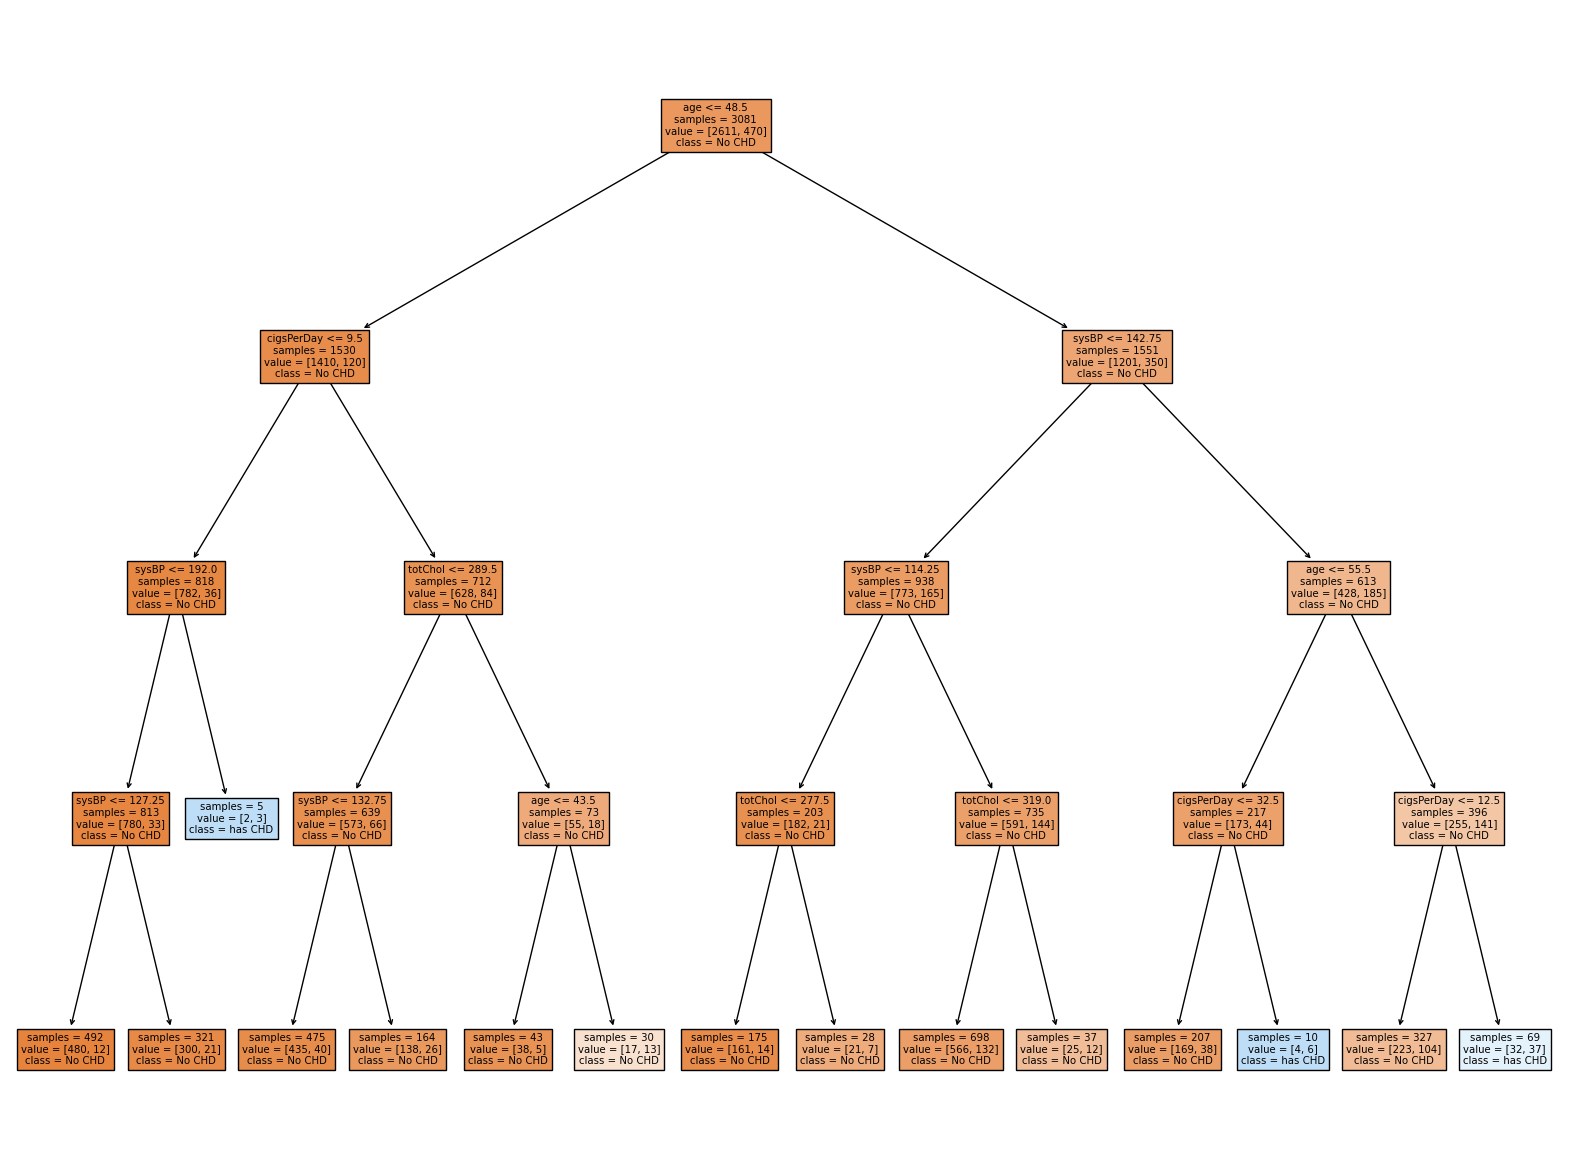

Accuracy: 0.8570038910505836


In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

#variables chosen to dtermine the relationship between numeric and cat variables
selected_features = ['age', 'currentSmoker', 'cigsPerDay', 'totChol', 'sysBP']
target_variable = 'TenYearCHD'

# filter dataset to include only selected features and target variable
trainData = df_train[selected_features + [target_variable]]
testData = df_test[selected_features + [target_variable]]

# process data, dropped values that were NA so data can be processed
trainData.dropna(inplace=True)
testData.dropna(inplace=True)

# split training and testing data into features (X) and target variable (y)
X_train = trainData[selected_features]
y_train= trainData[target_variable]
X_test = testData[selected_features]
y_test= testData[target_variable]

#decision tree model
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,random_state=42)
clf.fit(X_train , y_train)
var_names = clf.feature_names_in_
plt.figure(figsize=(20, 15))#adjusts size to make larger
plot_tree(clf,filled=True,feature_names=var_names, class_names=['No CHD', 'has CHD'], impurity=False) #classifies decision with yes or no for CHD
plt.show()

y_pred = clf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Our group aimed to build a decision tree model using selected variables like age, current smoker status, cigarettes smoked per day (cigsPerDay), total cholesterol (totChol), and systolic blood pressure (sysBP) to predict whether someone has coronary heart disease (CHD) or not. These variables are known risk factors or indicators for CHD. Age is a well-established risk factor, smoking is strongly associated with increased CHD risk, and elevated levels of total cholesterol and systolic blood pressure are also significant predictors of CHD. By combining categorical and numerical data, we sought to create a model with real-life applicability, where parameters can be tuned to improve performance, and insights can be gained into how different variables contribute to CHD risk.

The decision tree model, particularly for systolic blood pressure (sysBP), achieved an accuracy of 0.857 after adjusting various parameters such as max depth and minimum sample size. The model revealed intriguing insights, such as individuals below the age of 48 who smoke less than 9 cigarettes per day but have a systolic blood pressure above 192 may still be at risk for CHD. Similarly, individuals above the age of 55 with high systolic blood pressure and a smoking habit of more than 12 cigarettes per day are also identified as at-risk.

However, the model does have some limitations. It appears to create overly complex decision rules based on rare combinations of features present only in the training data, which may hinder its generalizability to new patients. Additionally, the model may struggle to capture the imbalance in CHD risk, as it may be biased towards predicting the majority class. This could result in the overlooking of important patterns related to CHD risk in the minority class, leading to suboptimal performance in predicting CHD risk.

<ipython-input-65-787e8e8041e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.dropna(inplace=True)
<ipython-input-65-787e8e8041e0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData.dropna(inplace=True)


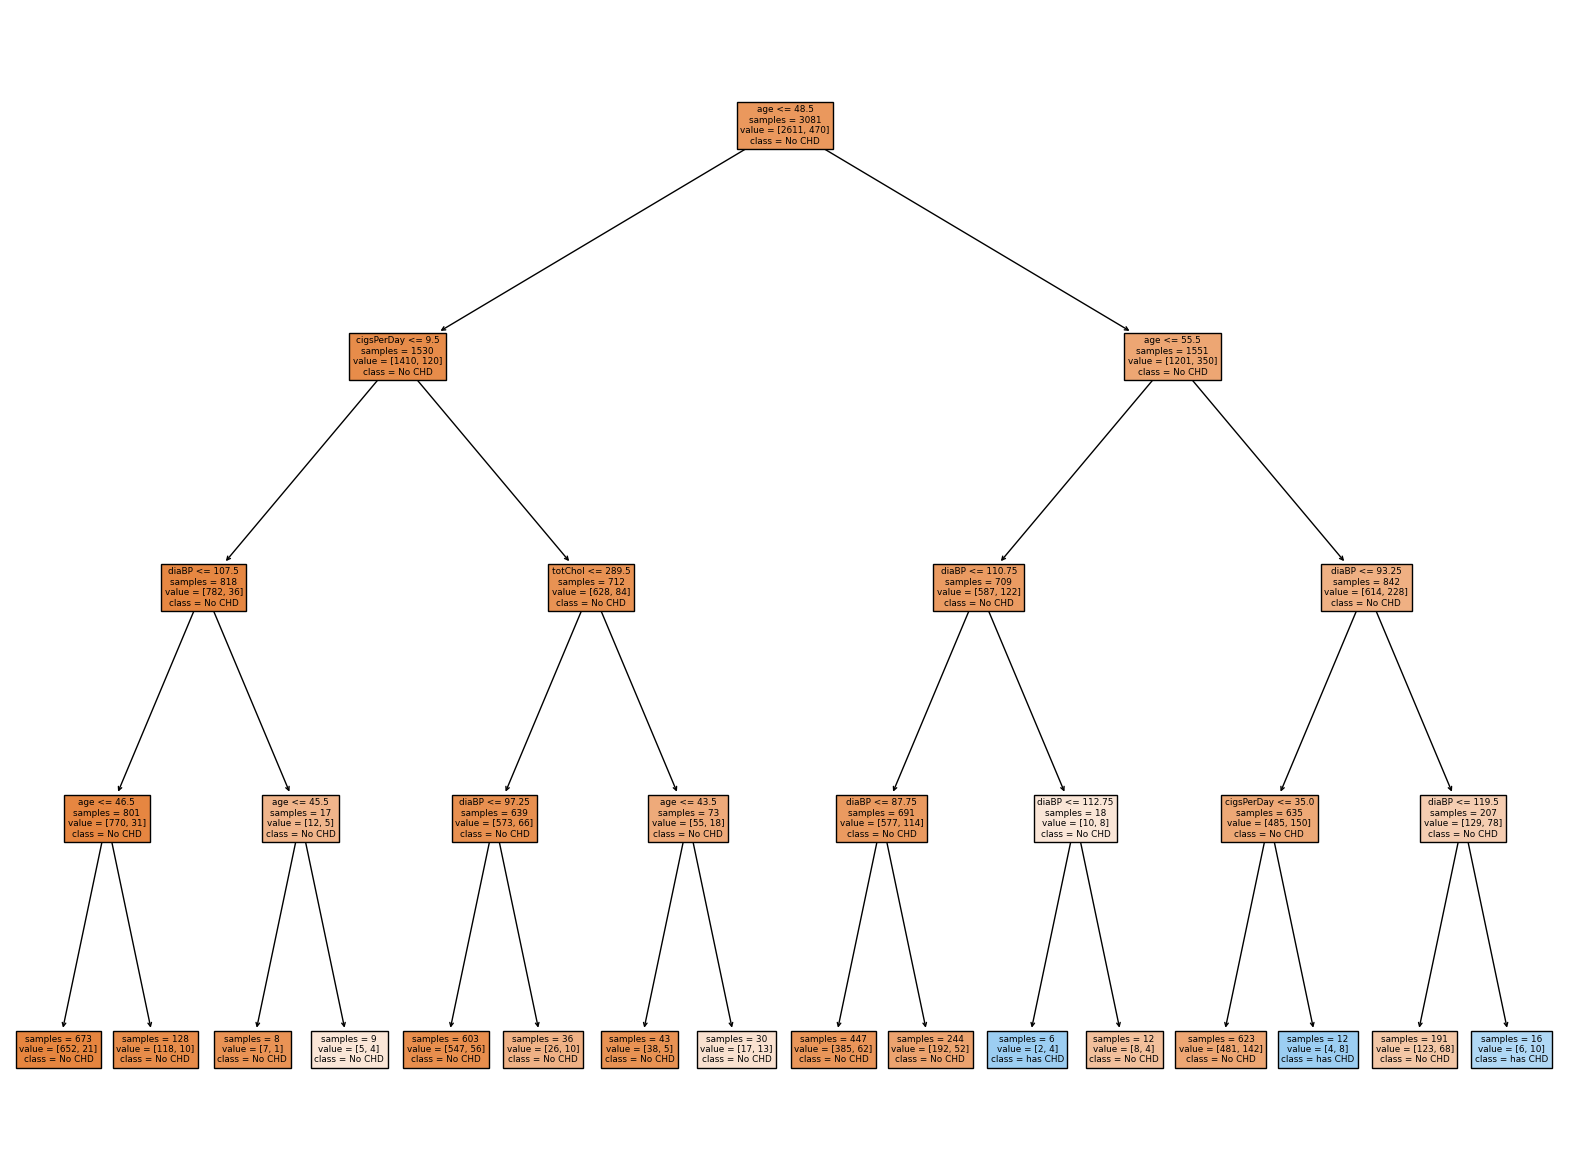

Accuracy: 0.8501945525291829


In [65]:
selected_features = ['age', 'currentSmoker', 'cigsPerDay', 'totChol', 'diaBP'] #variables chosen to dtermine the relationship between numeric and cat variables
target_variable = 'TenYearCHD'

# filter dataset to include only selected features and target variable
trainData = df_train[selected_features + [target_variable]]
testData = df_test[selected_features + [target_variable]]

# process data, dropped values that were NA so data can be processed
trainData.dropna(inplace=True)
testData.dropna(inplace=True)

# split training and testing data into features (X) and target variable (y)
X_train = trainData[selected_features]
y_train= trainData[target_variable]
X_test = testData[selected_features]
y_test= testData[target_variable]

#decision tree model
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,random_state=42)
clf.fit(X_train , y_train)
var_names = clf.feature_names_in_
plt.figure(figsize=(20, 15))#adjusts size to make larger
plot_tree(clf,filled=True,feature_names=var_names, class_names=['No CHD', 'has CHD'], impurity=False) #classifies decision with yes or no for CHD
plt.show()

y_pred = clf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In further analyzing the effects of blood pressure, this decision tree replaces systolic blood pressure data with diastolic blood pressure data. We anticipate that when building a predictive model for CHD, including both systolic and diastolic blood pressure as separate features may provide a more comprehensive understanding of cardiovascular risk. Analyzing the relationship between diastolic bloop pressure and CHD risk alongside other relevant variables such as age, cholesterol levels, smoking status, and family history of heart disease can help identify individuals at higher risk and guide preventive measures and treatment strategies.

The model achieved an accuracy of 0.85. It shows that individuals above the age of 55 with diastolic blood pressure higher than 119.5, those with a lower diastolic pressure but who smoke more than 35 cigarettes per day, and those with a blood pressure between 110-112 are predicted to have a risk of CHD.

When comparing the use of systolic versus diastolic blood pressure in the models, it's important to note that systolic blood pressure represents the pressure in the arteries when the heart beats, while diastolic blood pressure represents the pressure when the heart is at rest between beats. Both measures are important indicators of cardiovascular health and can provide valuable insights into CHD risk. By including both systolic and diastolic blood pressure as separate features in the model, we can capture different aspects of blood pressure dynamics and potentially improve the accuracy of CHD risk prediction.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Load in the training and testing data again
df_train = pd.read_csv('/content/project_chd/fhs_train.csv')
df_test = pd.read_csv('/content/project_chd/fhs_test.csv')

#Dropping columns that we won't be using from both the training and testing datasets
columns_to_drop = ['sex', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'sysBP',	'diaBP',	'BMI',	'glucose'	 ]
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

#Dropping any rows with missing data in both datasets
df_train = df_train.dropna()
df_test = df_test.dropna()

In [67]:
#Created a maxmin function to calculate maxmin normalizations to scale the data for heartRate and totChol data in both datasets
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

df_train['totChol'] = maxmin(df_train['totChol'])
df_train['heartRate'] = maxmin(df_train['heartRate'])
df_test['totChol'] = maxmin(df_test['totChol'])
df_test['heartRate'] = maxmin(df_test['heartRate'])

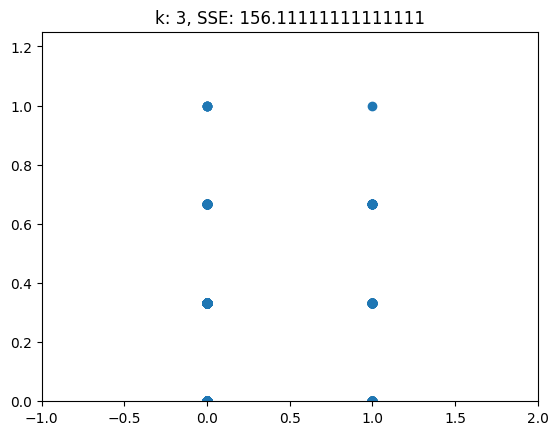

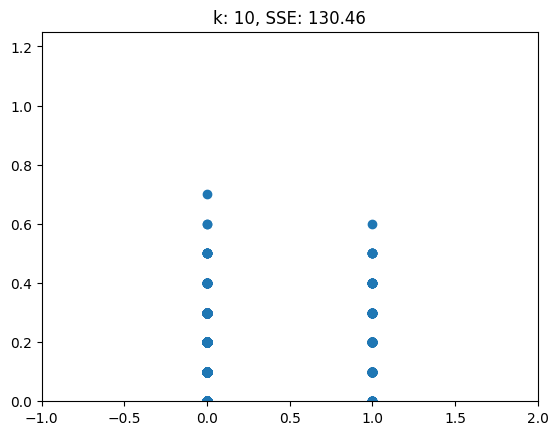

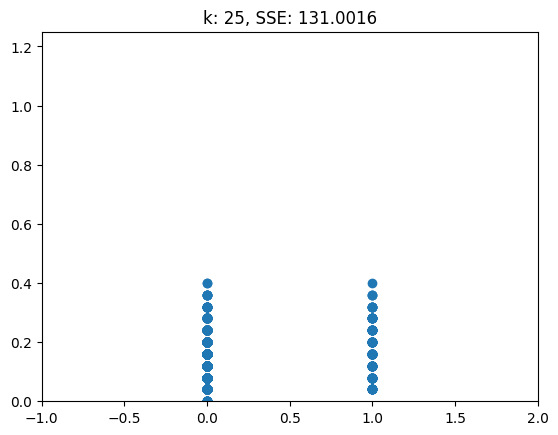

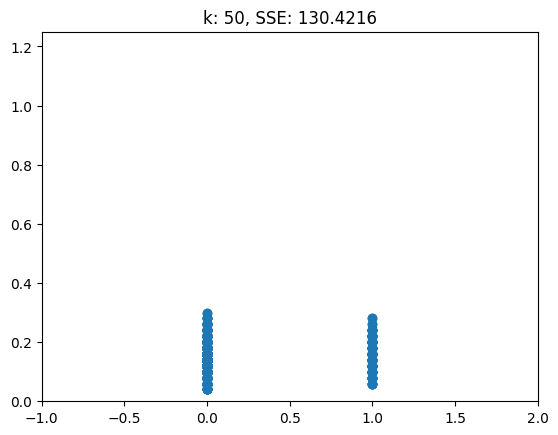

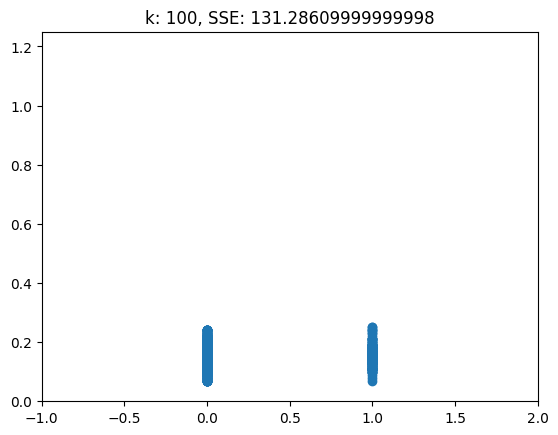

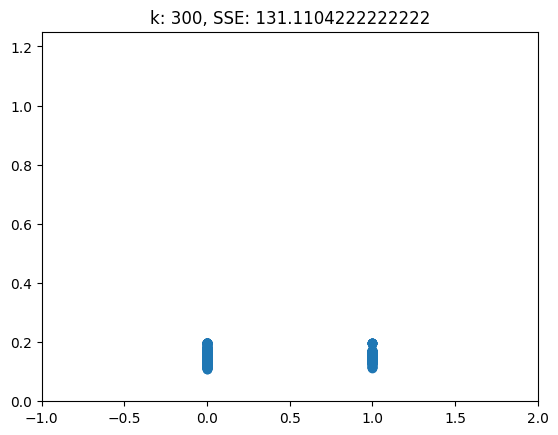

In [68]:
#Extracting the target variable 'TenYearCHD' to compare it to the other variables in the datasets
y_train = df_train['TenYearCHD']
X_train = df_train.drop('TenYearCHD',axis=1)
y_test = df_test['TenYearCHD']
X_test = df_test.drop('TenYearCHD',axis=1)

#Training KNN for different values of k and calculating the sum of squares of each to find the optimal k
for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(0,1.25)
    axes.set_xlim(-1, 2)
    plt.show()

[21]


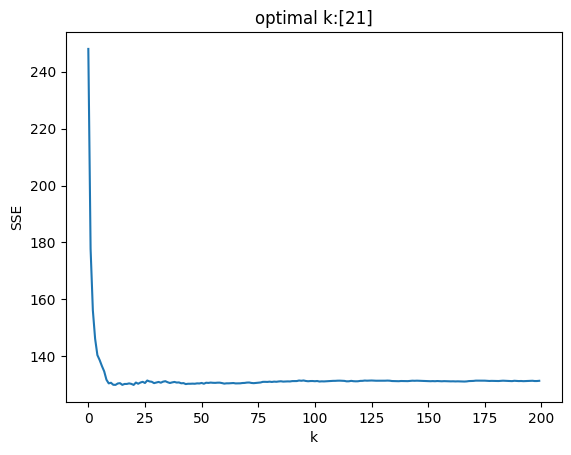

In [69]:
#Determine the optimal k by finding the k that minimizes SSE
k_bar = 200
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

#Fit the model with the optimal k found and predict
model_optimal = KNeighborsRegressor(n_neighbors=k_star[0]).fit(X_train, y_train)
y_hat_optimal = model_optimal.predict(X_test)

#Plotting the SSE by k to find the optimal k
plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

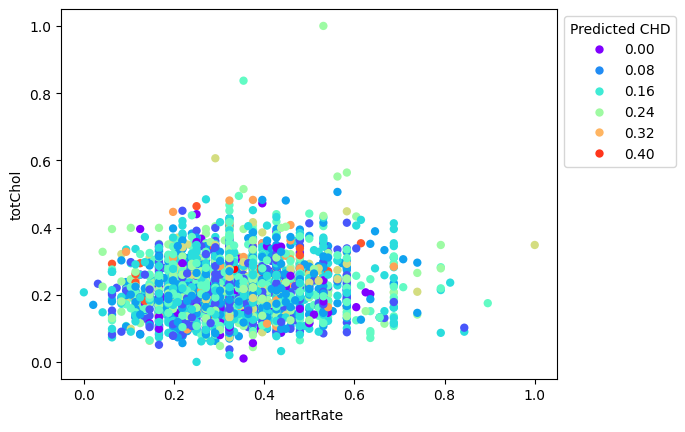

In [70]:
#Creating a new dataframe to show predicted CHD based on normalized heart rate and cholesterol
x_hat = pd.DataFrame({'heartRate':X_train['heartRate'],'totChol':X_train['totChol']})
y_hat_train = model_optimal.predict(X_train)
x_hat['Predicted CHD'] = y_hat_train

#Plotting the predictions to see the relationship between heartrate, cholesterol, and predicted CHD
this_plot = sns.scatterplot(data=x_hat,x='heartRate',y='totChol',
                            hue='Predicted CHD', palette = 'rainbow', linewidth=0)
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

In [71]:
#Creating a confusion matrix to evaluate the model's predictions with the test data versus the actual results
knn = KNeighborsClassifier(n_neighbors=21)
predictor = knn.fit(X_train.values, y_train)
y_hat = predictor.predict(X_test.values)
accuracy = knn.score(X_test.values, y_test)
print('Accuracy: ', accuracy)
pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])

Accuracy:  0.8540076335877863


Predicted,0
Actual,
0,895
1,153


In [72]:
combined_df = pd.concat([df_train, df_test], ignore_index=True)
combined_df.loc[:, ['totChol', 'TenYearCHD']].groupby('TenYearCHD').describe()

totChol                                                    \
             count      mean       std       min       25%       50%   
TenYearCHD                                                             
0           3555.0  0.248295  0.107485  0.010187  0.174873  0.229202   
1            634.0  0.265665  0.109308  0.000000  0.190153  0.250424   

                                
                 75%       max  
TenYearCHD                      
0           0.297114  1.000000  
1           0.317143  0.837012

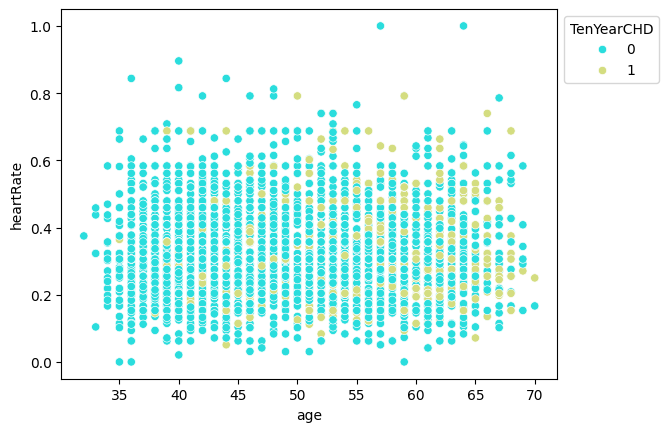

In [73]:
this_plot = sns.scatterplot(data=combined_df,x='age',y='heartRate',
                            hue='TenYearCHD',
                           palette = 'rainbow')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

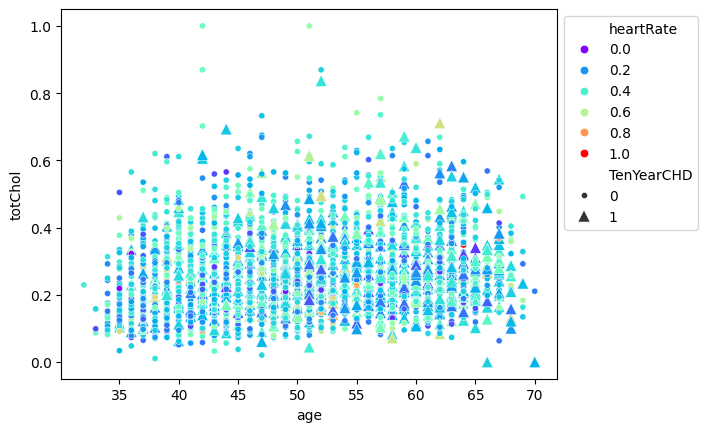

In [74]:
this_plot = sns.scatterplot(data=combined_df,
                            x='age',
                            y='totChol',
                            hue = 'heartRate',
                            style = 'TenYearCHD',
                            palette = 'rainbow' ,
                            size = 'TenYearCHD',
                            sizes = (70, 20),
                            markers = ['o', '^'])
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

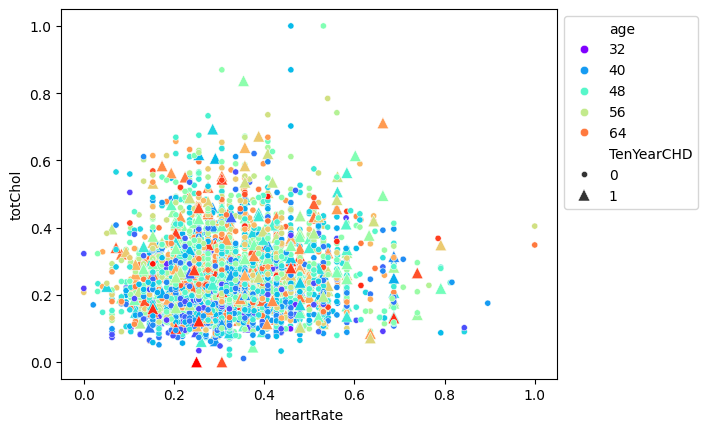

In [75]:
this_plot = sns.scatterplot(data=combined_df,
                            x='heartRate',
                            y='totChol',
                            hue = 'age',
                            style = 'TenYearCHD',
                            palette = 'rainbow' ,
                            size = 'TenYearCHD',
                            sizes = (70, 20),
                            markers = ['o', '^'])
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

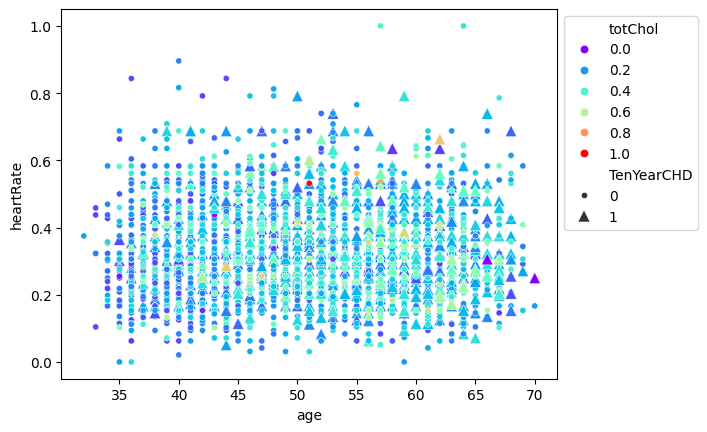

In [76]:
this_plot = sns.scatterplot(data=combined_df,
                            x='age',
                            y='heartRate',
                            hue = 'totChol',
                            style = 'TenYearCHD',
                            palette = 'rainbow' ,
                            size = 'TenYearCHD',
                            sizes = (70, 20),
                            markers = ['o', '^'])
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))